## Hypothesis testing on bank dataset

#### Central Limit Theorem
* The central limit theorem describes the shape of the distribution of sample means as a Gaussian, which is a distribution that statistics knows a lot about. How to develop an example of simulated dice rolls in Python to demonstrate the central limit theorem.

#### What is hypothesis testing ?

* Hypothesis testing is a statistical method that is used in making statistical decisions using experimental data. Hypothesis Testing is basically an assumption that we make about the population parameter.

#### why do we use it ?

* Hypothesis testing is an essential procedure in statistics. A hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data. When we say that a finding is statistically significant, it’s thanks to a hypothesis test.

#### Normal Distribution -

* A variable is said to be normally distributed or have a normal distribution if its distribution has the shape of a normal curve — a special bell-shaped curve. … The graph of a normal distribution is called the normal curve, which has all of the following properties: 1. The mean, median, and mode are equal.

* X_new = X-X_min/X_max-X_min

#### Standardised Normal Distribution 

* A standard normal distribution is a normal distribution with mean 0 and standard deviation 1

* X_new = X - mean/standar_deviation

* Null hypothesis :- In inferential statistics, the null hypothesis is a general statement or default position that there is no relationship between two measured phenomena, or no association among groups

#### Alternative hypothesis :-

* The alternative hypothesis is the hypothesis used in hypothesis testing that is contrary to the null hypothesis. It is usually taken to be that the observations are the result of a real effect (with some amount of chance variation superposed)

* Level of significance: Refers to the degree of significance in which we accept or reject the null-hypothesis. 100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance that is usually 5%.

* This is normally denoted with alpha(maths symbol ) and generally it is 0.05 or 5% , which means your output should be 95% confident to give similar kind of result in each sample.

#### One tailed test :
* A test of a statistical hypothesis , where the region of rejection is on only one side of the sampling distribution , is called a one-tailed test.

#### Two-tailed test :
* A two-tailed test is a statistical test in which the critical area of a distribution is two-sided and tests whether a sample is greater than or less than a certain range of values. If the sample being tested falls into either of the critical areas, the alternative hypothesis is accepted instead of the null hypothesis.

#### P-value :
* The P value, or calculated probability, is the probability of finding the observed, or more extreme, results when the null hypothesis (H 0) of a study question is true — the definition of ‘extreme’ depends on how the hypothesis is being tested.

* If your P value is less than the chosen significance level then you reject the null hypothesis i.e. accept that your sample gives reasonable evidence to support the alternative hypothesis. It does NOT imply a “meaningful” or “important” difference; that is for you to decide when considering the real-world relevance of your result.

#### Degree of freedom :
* Now imagine you’re not into hats. You’re into data analysis.You have a data set with 10 values. If you’re not estimating anything, each value can take on any number, right? Each value is completely free to vary.But suppose you want to test the population mean with a sample of 10 values, using a 1-sample t test. You now have a constraint — the estimation of the mean. What is that constraint, exactly? By definition of the mean, the following relationship must hold: The sum of all values in the data must equal n x mean, where n is the number of values in the data set.

## Ideas :- Bank has to set a marketing campaign to decide wether a customer is going to submit deposit or not. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. This incures cost to the company. And by doing hypothesis testing we can understand the effects of features on the target variables which will in turn help us target our crowd more appropriately

## Table of content
#### Hypothesis Testing
#### Hypothesis Testing and Their Assumption
#### Two sided sample T-test
#### chi-square test
#### information value test
#### Tool used :-Python 3.7.1

# dataset description
## bank_client_data
1 - **age:** (numeric)
2 - **job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - **marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - **education:** (categorical: primary, secondary, tertiary and unknown)
5 - **default:** has credit in default? (categorical: 'no','yes','unknown')
6 - **housing:** has housing loan? (categorical: 'no','yes','unknown')
7 - **loan:** has personal loan? (categorical: 'no','yes','unknown')
8 - **balance:** Balance of the individual.
## Aii. Related with the last contact of the current campaign:
8 - **contact:** contact communication type (categorical: 'cellular','telephone')
9 - **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - **day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## Aiii. other attributes:
12 - **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - **previous:** number of contacts performed before this campaign and for this client (numeric)
15 - **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

output variable (desired target):
16 - **deposit** - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.chdir("C:\\Users\\MANDY\\Desktop\\dataset\\bank")

In [3]:
train=pd.read_csv("bank dataset.csv")
# df=pd.read_csv("bank dataset.csv")

In [4]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
deposit      45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* here in the above cell it shows our dataset has no null value so we can process further for hypothesis testing to check our variables are significant or not!

* check the distribution of age it shows that most people who has taken the term deposit are between of the 24 to 40

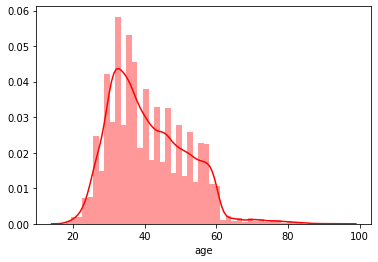

In [7]:
sns.distplot(train['age'],label='age',color='r')
plt.show()

In [8]:
#Segregating the numeric and categorical variable names

numeric=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
catgorical=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]
print('numerical = ' ,numeric)
print('categorical = ' ,catgorical)

numerical =  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical =  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


* chech how many numerical and categorical variable we have

In [9]:
print(len(numeric))
print(len(catgorical))

7
10


In [10]:
# A numerical coding for target variable so we can do hypothesis tresting
train.deposit[train.deposit=='no']=0
train.deposit[train.deposit=='yes']=1

C:\Users\MANDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\MANDY\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [12]:
train.describe([0.05,0.995])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
5%,27.000000,-172.000000,3.000000,35.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
99.5%,77.000000,18014.350000,31.000000,1501.900000,21.000000,410.000000,12.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


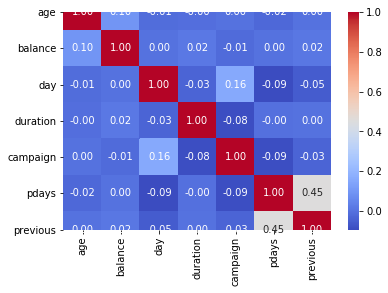

<Figure size 432x288 with 0 Axes>

In [32]:
sns.heatmap(train.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()
plt.savefig('bank_data_heatmap.jpg')

In [14]:
deposit_yes = train.loc[train["deposit"] == 1]
deposit_no =  train.loc[train["deposit"] == 0]    

### calculate pair t-test

* hypothesis testing for variable duration

In [15]:
import scipy.stats as stats
stats.ttest_ind(deposit_yes['duration'],deposit_no['duration'])

Ttest_indResult(statistic=91.28943612670862, pvalue=0.0)

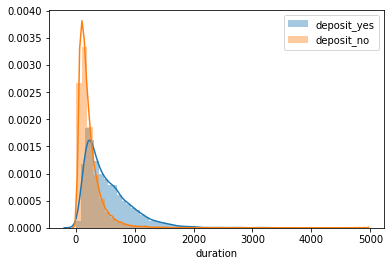

In [16]:
sns.distplot(deposit_yes['duration'],label='deposit_yes')
sns.distplot(deposit_no['duration'],label='deposit_no')
plt.legend();


#### Type I error: 
* When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region

#### Type II errors:
* When we fail to reject the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.

### Two sample T-test  between duration and deposit
### To check varaible duration is significant or not for we create a hypothesis
* Null hypothesis testing(H0) :- call duration is not impacting on marketing campaign
* Alternate hypothesis(H1) :- call duration is impacting on marketing campaign
* call duration is giving impact on marketing campaign means a customer is attracted during marketing campaign so he is going to give deposit and
* Type 1 error :- Type 1 error will occur when call duration do not impact marketing campaign but we falsely reject null hypothesis 
* Type 2 error :- Type 2 error  will occur when call duration  impact marketing campaign but we fail to reject null hypothesis. 

In [17]:
import scipy.stats as stats
stats.ttest_ind(deposit_yes['age'],deposit_no['age'])

Ttest_indResult(statistic=5.350255423036203, pvalue=8.825643691922395e-08)

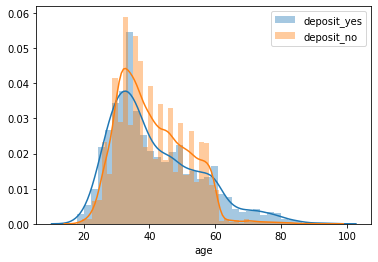

In [18]:
sns.distplot(deposit_yes['age'],label='deposit_yes')
sns.distplot(deposit_no['age'],label='deposit_no')
plt.legend();

### Two sample T-test  between age and deposit
### To check varaible age is significant or not for we create a hypothesis
* Null hypothesis testing(H0) :- Age of customer is not dependent on term deposit
* Alternate hypothesis(H1) :- Age of customer is depend on term deposit
* Age of customer is going to impact on marketing campaign means a customer's age is depending on custemer's age becuase i got P-value for variable age is 8.825643691922395e-08 that is below than our level of significant(where alpha = 0.05).so here type 1 error occurs so wegoing to reject null hypothesis.
* Type 1 error :- Type 1 error will occur when age do not impact marketing campaign but we falsely reject null hypothesis 
* Type 2 error :- Type 2 error  will occur when age  impact marketing campaign but we fail to reject null hypothesis.

In [19]:
import scipy.stats as stats
stats.ttest_ind(deposit_yes['balance'],deposit_no['balance'])

Ttest_indResult(statistic=11.25043445878562, pvalue=2.5211136918751468e-29)

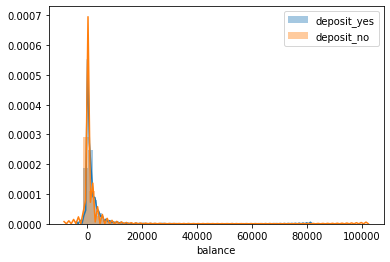

In [20]:
sns.distplot(deposit_yes['balance'],label='deposit_yes')
sns.distplot(deposit_no['balance'],label='deposit_no')
plt.legend();

### Two sample T-test between balance and deposit
### To check varaible Balance is significant or not for we create a hypothesis

  *  Null hypothesis testing(H0) :- balance of customer is not dependent on term deposit
  *  Alternate hypothesis(H1) :- balance of customer is depend on term deposit
  * Account Balance of customer is going to impact on marketing campaign means a customer's balance is depending on custemer's term deposit becuase i got P-value for variable age is 8.825643691922395e-08 that is below than our level of significant(where alpha = 0.05).so herr type 1 error occurs so wegoing to reject null hypothesis.
* Type 1 error :- Type 1 error will occur when balance do not impact marketing campaign but we falsely reject null hypothesis 
* Type 2 error :- Type 2 error  will occur when balance  impact marketing campaign but we fail to reject null hypothesis.


In [21]:
import scipy.stats as stats
stats.ttest_ind(deposit_yes['day'],deposit_no['day'])

Ttest_indResult(statistic=-6.029843252838383, pvalue=1.653880160817521e-09)

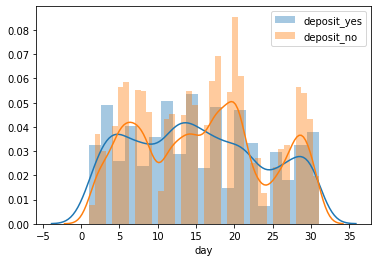

In [22]:
sns.distplot(deposit_yes['day'],label='deposit_yes')
sns.distplot(deposit_no['day'],label='deposit_no')
plt.legend();

### Two sample T-test between day and deposit
To check varaible day is significant or not for we create a hypothesis

 *    Null hypothesis testing(H0) :- day is not dependent on term deposit
 *    Alternate hypothesis(H1) :- day is depend on term deposit
 *  day is going to impact on term deposit means a variable day is depending on custemer's term deposit becuase i got P-value for variable age is 1.653880160817521e-09 that is below than our level of significant(where alpha = 0.05).so herr type 1 error occurs so wegoing to reject null hypothesis.
 * Type 1 error :- Type 1 error will occur when day do not impact marketing campaign but we falsely reject null hypothesis 
* Type 2 error :- Type 2 error  will occur when day  impact marketing campaign but we fail to reject null hypothesis.

In [23]:
import scipy.stats as stats
stats.ttest_ind(deposit_yes['campaign'],deposit_no['campaign'])

Ttest_indResult(statistic=-15.599948860003781, pvalue=1.0123473642096297e-54)

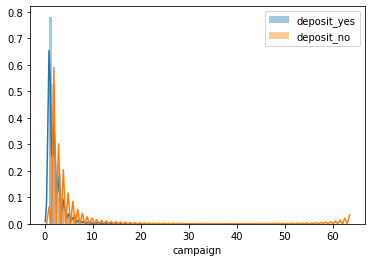

In [24]:
sns.distplot(deposit_yes['campaign'],label='deposit_yes')
sns.distplot(deposit_no['campaign'],label='deposit_no')
plt.legend();

### Two sample T-test between campaign and deposit
To check varaible campaign is significant or not for we create a hypothesis

   * Null hypothesis testing(H0) :- campaign is not dependent on term deposit
    * Alternate hypothesis(H1) :- campaign is depend on term deposit
    * campaign is going to impact on term deposit means a variable campaign is depending on custemer's term deposit becuase i got P-value 1.0123473642096297e-54 for variable campaign that is below than our level of significant(where alpha = 0.05).so here type 1 error occurs so we going to reject null hypothesis.
    * Type 1 error :- Type 1 error will occur when  campaign do not impact marketing campaign but we falsely reject null hypothesis 
* Type 2 error :- Type 2 error  will occur when campaign  impact marketing campaign but we fail to reject null hypothesis.

In [25]:
import scipy.stats as stats
stats.ttest_ind(deposit_yes['pdays'],deposit_no['pdays'])

Ttest_indResult(statistic=22.151671780724012, pvalue=3.790553319478034e-108)

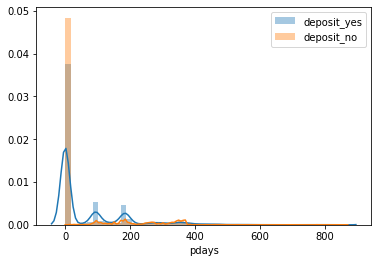

In [26]:
sns.distplot(deposit_yes['pdays'],label='deposit_yes')
sns.distplot(deposit_no['pdays'],label='deposit_no')
plt.legend();

### Two sample T-test between pdays and deposit
To check varaible padys is significant or not for we create a hypothesis

  * Null hypothesis testing(H0) :- Pdays is not dependent on term deposit
  * Alternate hypothesis(H1) :- Pdays is depend on term deposit
   * pdays is going to impact on term deposit means a variable pdays is depending on custemer's term deposit becuase i got P-value 3.790553319478034e-108 for variable pdays that is below than our level of significant(where alpha = 0.05).so here type 1 error occurs so we going to reject null hypothesis.
   * Type 1 error :- Type 1 error will occur when pdays do not impact marketing campaign but we falsely reject null hypothesis 
* Type 2 error :- Type 2 error  will occur when pdays impact marketing campaign but we fail to reject null hypothesis.

In [27]:
import scipy.stats as stats
stats.ttest_ind(deposit_yes['previous'],deposit_no['previous'])

Ttest_indResult(statistic=19.910901271473993, pvalue=7.801830349805211e-88)

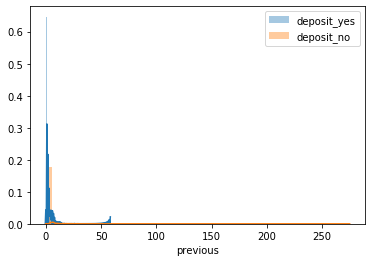

In [28]:
sns.distplot(deposit_yes['previous'],label='deposit_yes')
sns.distplot(deposit_no['previous'],label='deposit_no')
plt.legend();


### Two sample T-test between previous and deposit
To check varaible previous is significant or not for we create a hypothesis

  * Null hypothesis testing(H0) :- Previous is not dependent on term deposit
  * Alternate hypothesis(H1) :- Previous is depend on term deposit
  * previous is going to impact on term deposit means a variable previous is depending on custemer's term deposit becuase i got P-value 7.801830349805211e-88 for variable previous that is below than our level of significant(where alpha = 0.05).so here type 1 error occurs so we going to reject null hypothesis
  * Type 1 error :- Type 1 error will occur when previous do not impact marketing campaign but we falsely reject null hypothesis 
* Type 2 error :- Type 2 error  will occur when previous  impact marketing campaign but we fail to reject null hypothesis.

* we have calculated T-test with th help of stats library we have 7 numerical variable so we have to do it 7 times .here i have make a dataframe and pass all the numerical variable in the dataframe so we got all the value in a dataframe

In [29]:
## performing the independent t test on numerical variables
import scipy.stats as stats
#make a dataframe
tstats_df = pd.DataFrame()
# run a loop for all numerical variable
for eachvariable in numeric:
    
    tstats = stats.ttest_ind(train.loc[train["deposit"] == 1,eachvariable],train.loc[train["deposit"] == 0, eachvariable],equal_var=False)
    temp = pd.DataFrame([eachvariable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)
    
tstats_df =  tstats_df.sort_values(by = "P-Value").reset_index(drop = True)
tstats_df

,Variable Name,T-Statistic,P-Value
0,duration,57.5141,0
1,campaign,-22.8007,3.72894e-112
2,pdays,18.9435,7.33443e-78
3,previous,18.118,1.35578e-71
4,balance,9.93355,4.38373e-23
5,day,-5.91698,3.44096e-09
6,age,4.31832,1.5971e-05


##### What is chi-square test?
* The Chi Square statistic is commonly used for testing relationships between categorical variables.  The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

## Chi- square test

##### Type I error:

  * When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region

##### Type II errors:

  * When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.

### Chi-square test  between job and deposit
 To check varaible job is significant or not for  we create a hypothesis

  * Null hypothesis testing(H0) :- job is not dependent on term deposit
  * Alternate hypothesis(H1) :- job is dependent on term deposit
  * In this hypothesis test we want to check the given variable job is going to impact on term deposit,after doing chi-square test we found that our p-value is 0.0000 and carmer's v is 0.1360 so we going to reject the null hypothesis and here is type 1 error occurs.
* Cramer's V is a way of calculating correlation in tables which have more than 2x2 rows and columns. It is used as post-test to determine strengths of association after chi-square has determined significance.
* Type 1 error :- Type 1 error will occur when job do not impact marketing campaign but we falsely reject null hypothesis 
* Type 2 error :- Type 2 error  will occur when job  impact marketing campaign but we fail to reject null hypothesis.

In [30]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(train["job"],train["deposit"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

,Chi-square test,results
0,Pearson Chi-square ( 11.0) =,836.1055
1,p-value =,0.0000
2,Cramer's V =,0.1360


In [31]:
table

NameError: name 'table' is not defined

In [ ]:
#### this will show adjuct P-value for each of the variable
#### our P-value is so small so it's show very small value

In [ ]:
table = pd.crosstab(train["housing"],train["deposit"])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table.values)
p


#### Chi-square test between marital and deposit
To check varaible previous is significant or not for we create a hypothesis

 * Null hypothesis testing(H0) :- marital is not dependent on term deposit
 * Alternate hypothesis(H1) :- marital  is dependent on term deposit
  * In this hypothesis test we want to check the given variable marital is going to impact on term deposit,after doing chi-square test we found that our p-value is 0.0000 and carmer's v is 0.1360 so we going to reject the null hypothesis and here is type 1 error occurs in this scenario.
  * Cramer's V is a way of calculating correlation in tables which have more than 2x2 rows and columns. It is used as post-test to determine strengths of association after chi-square has determined significance.
  * Type 1 error :- Type 1 error will occur when martial do not impact marketing campaign but we falsely reject null hypothesis 
* Type 2 error :- Type 2 error  will occur when martial  impact marketing campaign but we fail to reject null hypothesis.

In [ ]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(train["marital"],train["deposit"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

#### Chi-square test between martial and deposit
To check varaible education is significant or not for we create a hypothesis

* Null hypothesis testing(H0) :- education is not dependent on term deposit
* Alternate hypothesis(H1) :- education is dependent on term deposit
    * In this hypothesis test we want to check the given variable education is going to impact on term deposit,after doing chi-square test we found that our p-value is 0.0000 and carmer's v is 0.0727 so we going to reject the null hypothesis and here is type 1 error occurs in this scenario.
    * Cramer's V is a way of calculating correlation in tables which have more than 2x2 rows and columns. It is used as post-test to determine strengths of association after chi-square has determined significance.
    * Type 1 error :- Type 1 error will occur when martial do not impact marketing campaign but we falsely reject null hypothesis 
    * Type 2 error :- Type 2 error  will occur when martial  impact marketing campaign but we fail to reject null hypothesis.



In [ ]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(train["education"],train["deposit"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

#### Chi-square test between education and deposit
To check varaible previous is significant or not for we create a hypothesis

* Null hypothesis testing(H0) :- housing is not dependent on term deposit
* Alternate hypothesis(H1) :- housing is dependent on term deposit
    * In this hypothesis test we want to check the given variable housing is going to impact on term deposit,after doing chi-square test we found that our p-value is 0.0000 and carmer's v is 0.1392 so we going to reject the null hypothesis and here is type 1 error occurs in this scenario.
    * Cramer's V is a way of calculating correlation in tables which have more than 2x2 rows and columns. It is used as post-test to determine strengths of association after chi-square has determined significance.
    * Type 1 error :- Type 1 error will occur when education do not impact marketing campaign but we falsely reject null hypothesis 
   * Type 2 error :- Type 2 error  will occur when education impact marketing campaign but we fail to reject null hypothesis.

In [ ]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(train["housing"],train["deposit"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

#### Type I error:

* When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region

#### Type II errors:

* When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.

#### Chi-square test between marital and deposit
To check varaible loan is significant or not for we create a hypothesis

* Null hypothesis testing(H0) :- variable loan is not dependent on term deposit
* Alternate hypothesis(H1) :- variable loan is dependent on term deposit
    * In this hypothesis test we want to check the given variable loan is going to impact on term deposit,after doing chi-square test we found that our p-value is 0.0000 and carmer's v is 0.0682 so we going to reject the null hypothesis and here is type 1 error occurs in this scenario.
    * Cramer's V is a way of calculating correlation in tables which have more than 2x2 rows and columns. It is used as post-test to determine strengths of association after chi-square has determined significance.

In [ ]:
table = pd.crosstab(train['default'],train["deposit"])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table.values)
p


In [ ]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(train["loan"],train["deposit"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

In [ ]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(train["default"],train["deposit"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

#### Type I error:

* When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region

#### Type II errors:

* When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.

#### Chi-square test between marital and deposit
 To check varaible previous is significant or not for we create a hypothesis

* Null hypothesis testing(H0) :- varaiable contact is not dependent on term deposit
* Alternate hypothesis(H1) :- variable contact is dependent on term deposit
    * In this hypothesis test we want to check the given variable contact is going to impact on term deposit,after doing chi-square test we found that our p-value is 0.0000 and carmer's v is 0.1514 so we going to reject the null hypothesis and here is type 1 error occurs in this scenario.
    * Cramer's V is a way of calculating correlation in tables which have more than 2x2 rows and columns. It is used as post-test to determine strengths of association after chi-square has determined significance.

In [ ]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(train["contact"],train["deposit"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

#### Type I error:

* When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region

#### Type II errors:

* When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.

#### Chi-square test between marital and deposit
To check varaible previous is significant or not for we create a hypothesis

* Null hypothesis testing(H0) :- variable month is not dependent on term deposit
* Alternate hypothesis(H1) :- variable month  is dependent on term deposit
    * In this hypothesis test we want to check the given variable month is going to impact on term deposit,after doing chi-square test we found that our p-value is 0.0000 and carmer's v is 0.2602 so we going to reject the null hypothesis and here is type 1 error occurs in this scenario.
    * Cramer's V is a way of calculating correlation in tables which have more than 2x2 rows and columns. It is used as post-test to determine strengths of association after chi-square has determined significance.

In [ ]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(train["month"],train["deposit"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

#### Type I error:

* When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region

#### Type II errors:

* When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.

#### Chi-square test between marital and deposit
 To check varaible previous is significant or not for we create a hypothesis

* Null hypothesis testing(H0) :- poutcome is not dependent on term deposit
* Alternate hypothesis(H1) :- poutcome is dependent on term deposit
    * In this hypothesis test we want to check the given variable education is going to impact on term deposit,after doing chi-square test we found that our p-value is 0.0000 and carmer's v is 0.3117 so we going to reject the null hypothesis and here is type 1 error occurs in this scenario.
    * Cramer's V is a way of calculating correlation in tables which have more than 2x2 rows and columns. It is used as post-test to determine strengths of association after chi-square has determined significance.

In [ ]:
table = pd.crosstab(train['poutcome'],train["deposit"])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table.values)
p


In [ ]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(train["poutcome"],train["deposit"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

In [ ]:
def calc_iv(train, feature, target, pr=0):

    lst = []

    for i in range(train[feature].nunique()):
        val = list(train[feature].unique())[i]
        lst.append([feature, val, train[train[feature] == val].count()[feature], train[(train[feature] == val) & (train[target] == 'yes')].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['grp_score'] = round((data['Distribution Good']/(data['Distribution Good'] + data['Distribution Bad']))*10, 2)
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()
    data['Efficiency'] =  abs(data['Distribution Good'] - data['Distribution Bad'])/2  
    data = data.sort_values(by=['Variable', 'Value'], ascending=True)
#     d = {data['Distribution Good'],data['Distribution Bad'],data['Share'],
#         data['Bad Rate'],data['grp_score'],data['WoE'],data['IV'],data['Efficiency']}
#     mydf=pd.DataFrame(data=d)

    if pr == 0:
        print(data)

    return data['IV'].values[0]
#     return mydf.values

In [ ]:
for i in train.drop('deposit',axis=1).columns:
    calc_iv(train,i,'deposit')


In [ ]:
train.columns

In [ ]:
# check iv value

In [ ]:
import pandas as pd

# Calculate information value
def calc_iv(train, feature, target, pr=0):

    lst = []

    for i in range(train[feature].nunique()):
        val = list(train[feature].unique())[i]
        lst.append([feature, val, train[train[feature] == val].count()[feature], train[(train[feature] == val) & (train[target] == 'yes')].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if pr == 1:
        print(data)

    return data['IV'].values[0]

In [ ]:
calc_iv(data, 'train', 'deposit', pr=0)

* https://www.pythonfordatascience.org/chi-square-test-of-independence-python/

In [ ]:
lst=[]
for i in range(train['marital'].nunique()):
    val = list(train['marital'].unique())[i]
    lst.append(['marital', val, train[train['marital'] == val].count()['marital'], train[(train['marital'] == val) & (train['deposit'] == 1)].count()['marital']])
print(lst)

In [ ]:
train[train['deposit'] == 1].count()

In [ ]:
train.deposit.unique()

In [ ]:
list(train['marital'].unique())